# "Autoencoder" PCA Analogy

In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

/Users/erikallen/.virtualenvs/generative-models/lib/python3.6/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
# Load data from https://www.openml.org/d/554
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

In [3]:
X, Y = fetch_openml('mnist_784', version=1, return_X_y=True)
Y = np.array([int(o) for o in Y])
X /= 255.0

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=1/7, random_state=42)

In [5]:
pca = PCA(n_components=50)

# Train the "Auto-encoder"
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=50, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [6]:
def encoder(x, model):
    return model.transform(x)

def decoder(z, model):
    return model.inverse_transform(z)

In [7]:
Xp_train = decoder(encoder(X_train, pca), pca)
Xp_test = decoder(encoder(X_test, pca), pca)

In [8]:
mse_train = (np.square(Xp_train - X_train)).mean(axis=None)
mse_test = (np.square(Xp_test - X_test)).mean(axis=None)
print(mse_train, mse_test)

0.01174829429877172 0.01176272001225337


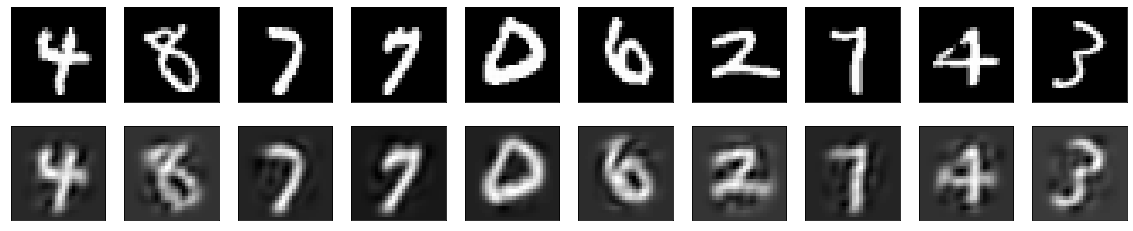

In [9]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(1,n+1):
    # display original
    ax = plt.subplot(2, n, i)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(Xp_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Denoising

In [12]:
noise_factor = 0.5
X_train_noisy = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)
X_test_noisy = X_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape)
X_train_noisy = np.clip(X_train_noisy, 0., 1.)
X_test_noisy = np.clip(X_test_noisy, 0., 1.)

In [20]:
pca = PCA(n_components=100)

# Train the "Auto-encoder"
pca.fit(X_train_noisy)

PCA(copy=True, iterated_power='auto', n_components=100, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [21]:
Xp_train_noisy = decoder(encoder(X_train_noisy, pca), pca)
Xp_test_noisy = decoder(encoder(X_test_noisy, pca), pca)

In [22]:
mse_train = (np.square(Xp_train_noisy - X_train)).mean(axis=None)
mse_test = (np.square(Xp_test_noisy - X_test)).mean(axis=None)
print(mse_train, mse_test)

0.053095163527458716 0.05280996270644182


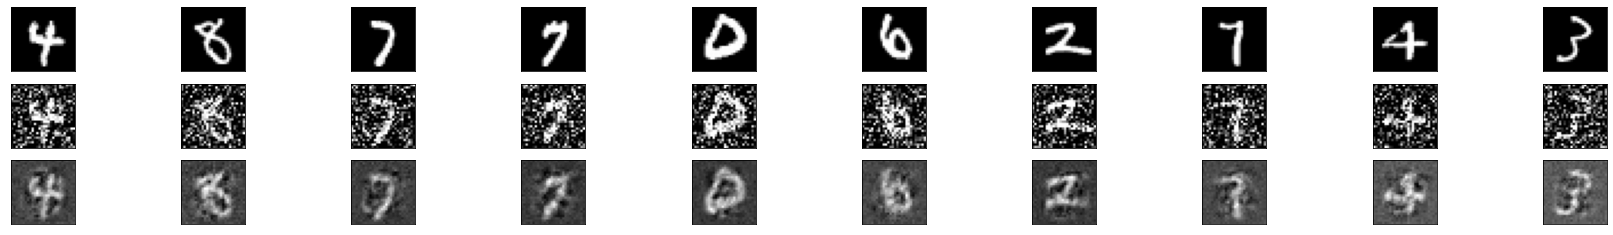

In [23]:
n = 10
plt.figure(figsize=(30, 4))
for i in range(1,n+1):
    # display original
    ax = plt.subplot(3, n, i)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display noisy
    ax = plt.subplot(3, n, i + n)
    plt.imshow(X_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(3, n, i + 2 * n)
    plt.imshow(Xp_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()